In [1]:
# Importing libraries

import pandas as pd 
import matplotlib.pyplot as plt


In [9]:
# Reading file

df = pd.read_csv(r"C:\Users\Gabon\Desktop\supermarketdata\superstore_final_dataset.csv",encoding='latin1')


In [10]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [11]:
# inspect columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [14]:
#check null values

df.isnull().sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

In [28]:
# converting time columns to datetime

df['Order_Date'] = pd.to_datetime(df['Order_Date'],format='mixed')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'],format='mixed')
display(df['Order_Date'], df['Ship_Date'])

0      2017-08-11
1      2017-08-11
2      2017-12-06
3      2016-11-10
4      2016-11-10
          ...    
9795   2017-05-21
9796   2016-12-01
9797   2016-12-01
9798   2016-12-01
9799   2016-12-01
Name: Order_Date, Length: 9800, dtype: datetime64[ns]

0      2017-11-11
1      2017-11-11
2      2017-06-16
3      2016-10-18
4      2016-10-18
          ...    
9795   2017-05-28
9796   2016-01-17
9797   2016-01-17
9798   2016-01-17
9799   2016-01-17
Name: Ship_Date, Length: 9800, dtype: datetime64[ns]

In [36]:
# check for duplicated rows

dups = df.duplicated().sum()
dups

0

In [85]:
# top and lowest sales by state


grouped_df = df.groupby('State')

top_by_state = grouped_df['Sales'].sum()
top_sorted = top_by_state.sort_values(ascending = False)

top_sales = pd.DataFrame({'State': top_sorted.index ,'Sales': top_sorted.values})
lowest_sales = pd.DataFrame({'State': top_sorted.sort_values(ascending=True).index, 'Sales': top_sorted.sort_values(ascending=True).values})

display(top_sales.head(10))
display(lowest_sales.head(10))

,State,Sales
0,California,446306.4635
1,New York,306361.1470
2,Texas,168572.5322
3,Washington,135206.8500
4,Pennsylvania,116276.6500
5,Florida,88436.5320
6,Illinois,79236.5170
7,Michigan,76136.0740
8,Ohio,75130.3500
9,Virginia,70636.7200


,State,Sales
0,North Dakota,919.910
1,West Virginia,1209.824
2,Maine,1270.530
3,South Dakota,1315.560
4,Wyoming,1603.136
5,District of Columbia,2865.020
6,Kansas,2914.310
7,Idaho,4382.486
8,Iowa,4443.560
9,New Mexico,4783.522


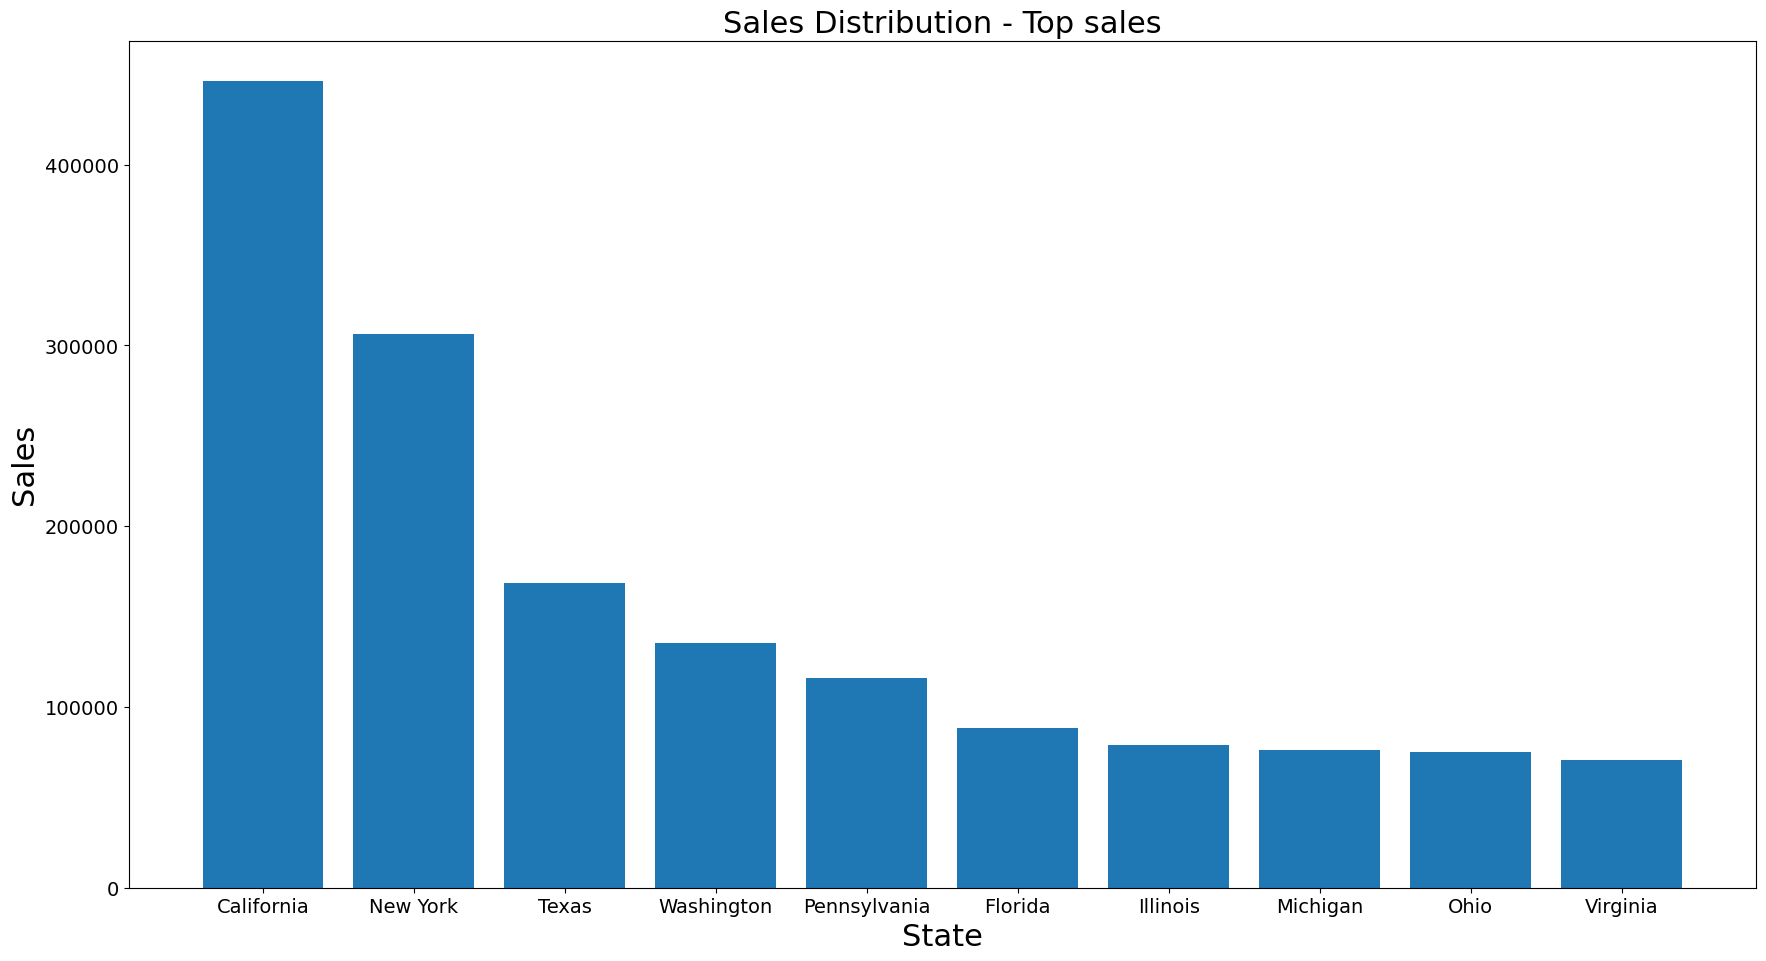

In [118]:
# Visualizing top 10 states with highest sales

top10 = top_sales.sort_values(by='Sales',ascending=False).head(10)
plt.figure(figsize=(21,11))
plt.bar(top10['State'],top10['Sales'])

plt.title('Sales Distribution - Top sales', fontsize= 22)
plt.xlabel('State', fontsize=22)
plt.ylabel('Sales', fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

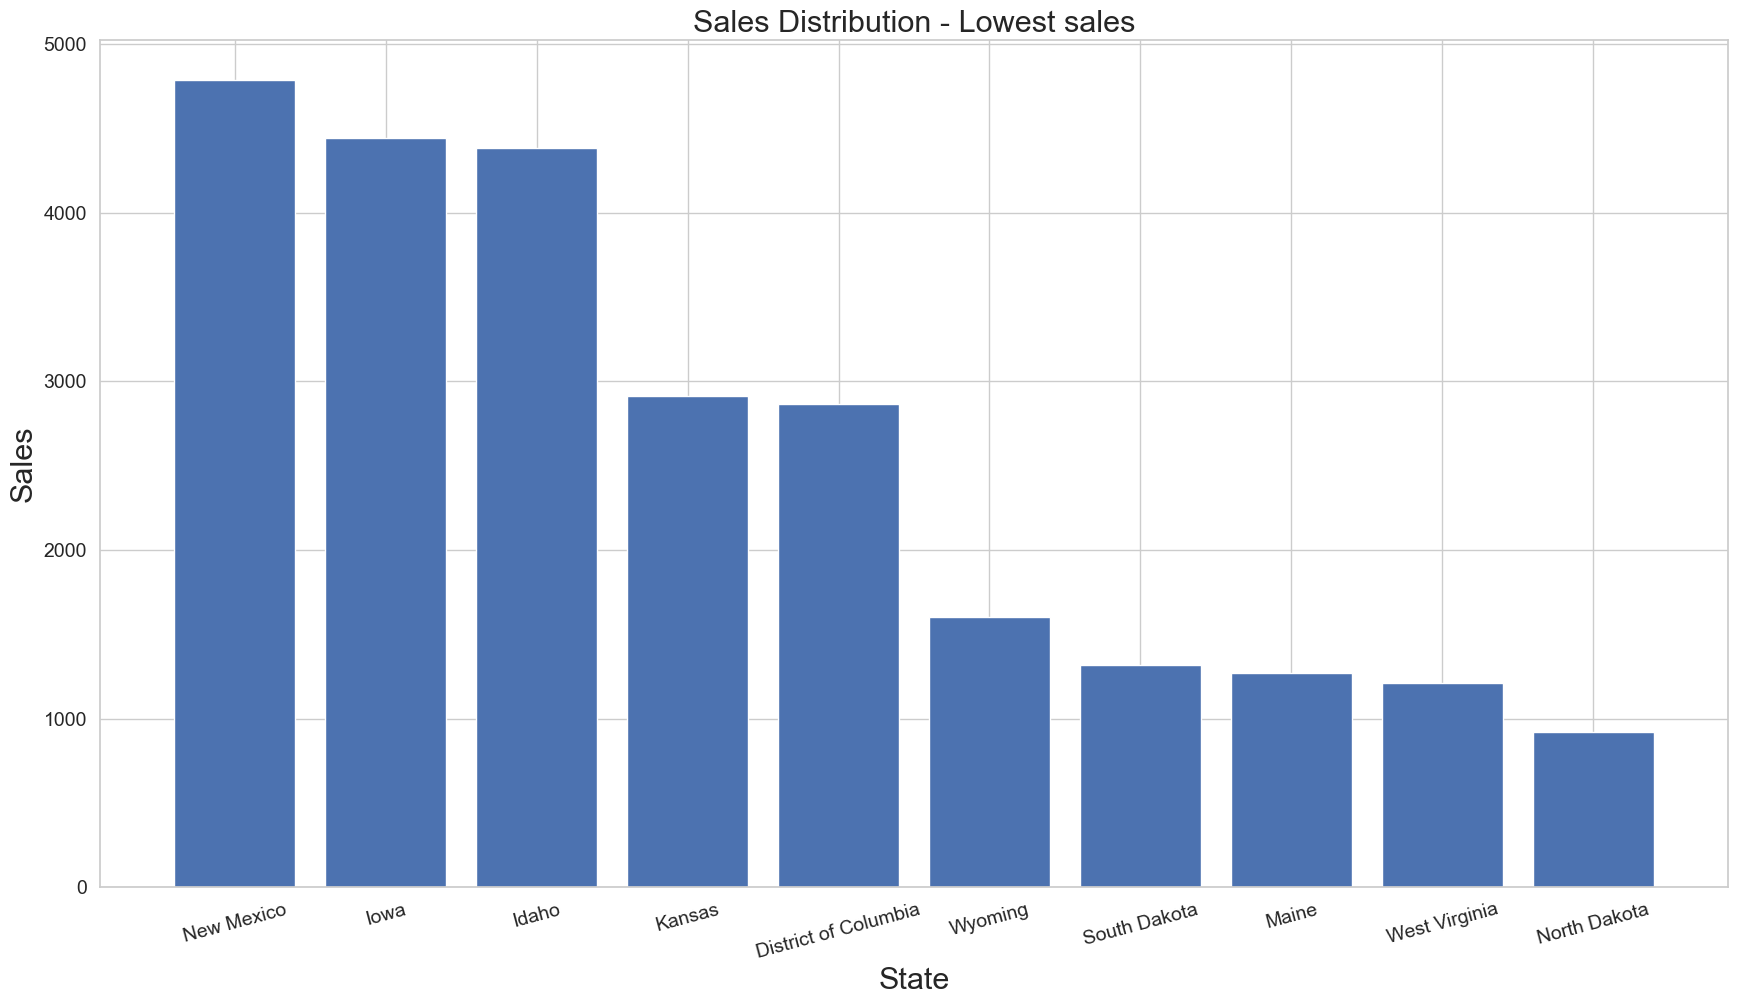

In [692]:
# Visualizing top 10 states with lowest sales

lowest = lowest_sales.sort_values(by='Sales').head(10)
plt.figure(figsize=(21,11))
plt.bar(lowest['State'],lowest['Sales'])

plt.title('Sales Distribution - Lowest sales', fontsize= 22)
plt.xlabel('State', fontsize=22)
plt.ylabel('Sales', fontsize=22)
plt.xticks(fontsize=14, rotation = 15)
plt.yticks(fontsize=14)
plt.gca().invert_xaxis()

plt.show()

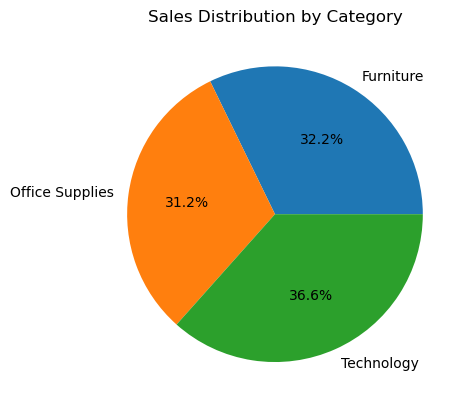

In [167]:
# Visualizing distribution of sales by category

df.groupby(['Category'])['Sales'].sum().plot(kind='pie',autopct='%1.1f%%')
plt.title('Sales Distribution by Category')
plt.ylabel('')
plt.show()

In [168]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [174]:
cat = df.groupby('Sub_Category')

top_by_cat = cat['Sales'].sum()
top_sorted = top_by_cat.sort_values(ascending = False)
sales_by_cat = pd.DataFrame({'Sub_Category': top_sorted.index ,'Sales': top_sorted.values})
sales_by_cat

,Sub_Category,Sales
0,Phones,327782.4480
1,Chairs,322822.7310
2,Storage,219343.3920
3,Tables,202810.6280
4,Binders,200028.7850
5,Machines,189238.6310
6,Accessories,164186.7000
7,Copiers,146248.0940
8,Bookcases,113813.1987
9,Appliances,104618.4030


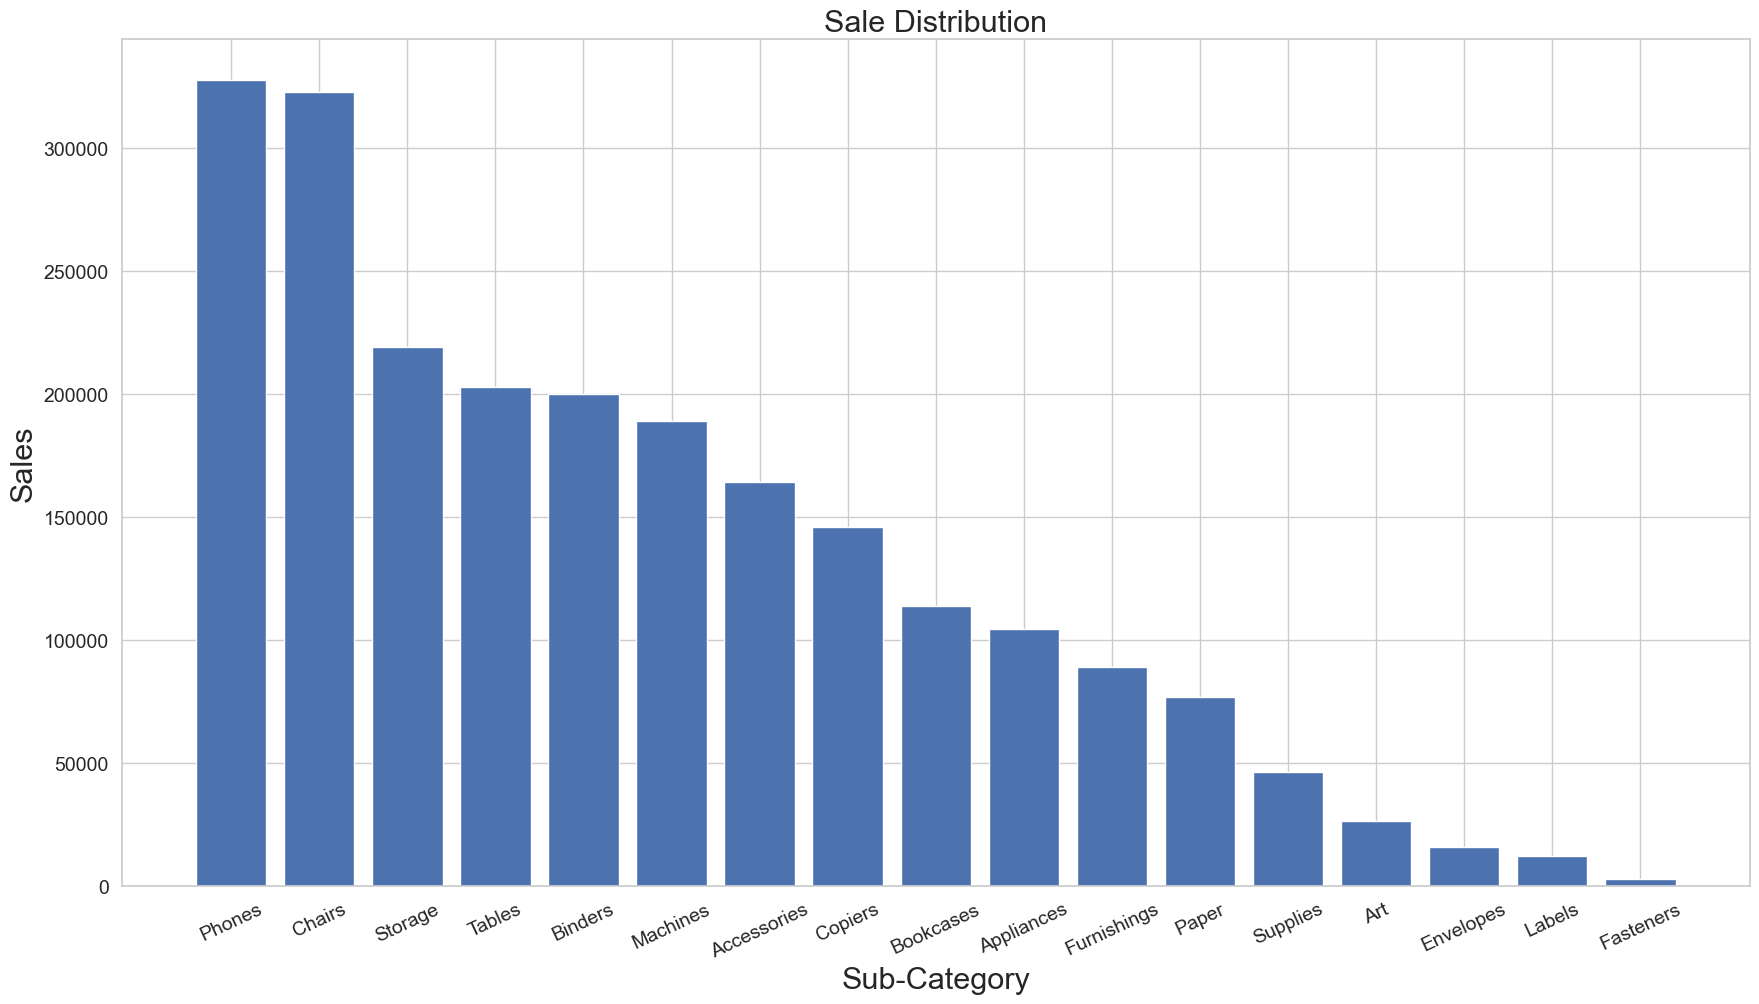

In [316]:
# Visualizing sale distribution of sub category items

subcat = sales_by_cat.sort_values(by='Sales',ascending=False).head(10)
plt.figure(figsize=(21,11))
plt.bar(sales_by_cat['Sub_Category'],sales_by_cat['Sales'])

plt.title('Sale Distribution', fontsize= 22)
plt.xlabel('Sub-Category', fontsize=22)
plt.ylabel('Sales', fontsize=22)
plt.xticks(fontsize=14, rotation = 25)
plt.yticks(fontsize=14)
plt.show()

In [186]:
cat_state = df.groupby(['Sub_Category', 'State'])

top_by_cat_state = cat_state['Sales'].sum()
top_sorted_state = top_by_cat_state.sort_values(ascending=False)
sales_by_cat_state = pd.DataFrame({'Sub_Category': top_sorted_state.index.get_level_values('Sub_Category'),
                                   'State': top_sorted_state.index.get_level_values('State'),
                                   'Sales': top_sorted_state.values})
sales_by_cat_state

scat = df.groupby(['Sub_Category','State'])

top_sorted_state = scat['Sales'].sum()
top_sorted_state = top_sorted_state.sort_values(ascending = False)
sales_by_scat = pd.DataFrame({'Sub_Category': top_sorted_state.index ,'Sales': top_sorted_state.values,'State':top_sorted_state.values})
sales_by_cat

,Sub_Category,State,Sales
0,Phones,California,67139.680
1,Chairs,California,61321.240
2,Phones,New York,47001.800
3,Chairs,New York,46061.073
4,Tables,California,45085.576
...,...,...,...
649,Fasteners,Nevada,4.710
650,Fasteners,Alabama,3.620
651,Appliances,Rhode Island,2.220
652,Envelopes,Vermont,2.040


In [337]:
# Sub category sales for California State

scat = df.groupby(['Sub_Category','State'])

top_sorted_state = scat['Sales'].sum()
top_sorted_state = top_sorted_state.sort_values(ascending = False)
sales_by_scat = pd.DataFrame({'Sub_Category': top_sorted_state.index.get_level_values('Sub_Category'),
                              'State': top_sorted_state.index.get_level_values('State'),
                              'Sales':top_sorted_state.values})

sales_by_scat_cal = sales_by_scat[sales_by_scat['State'] == 'California']



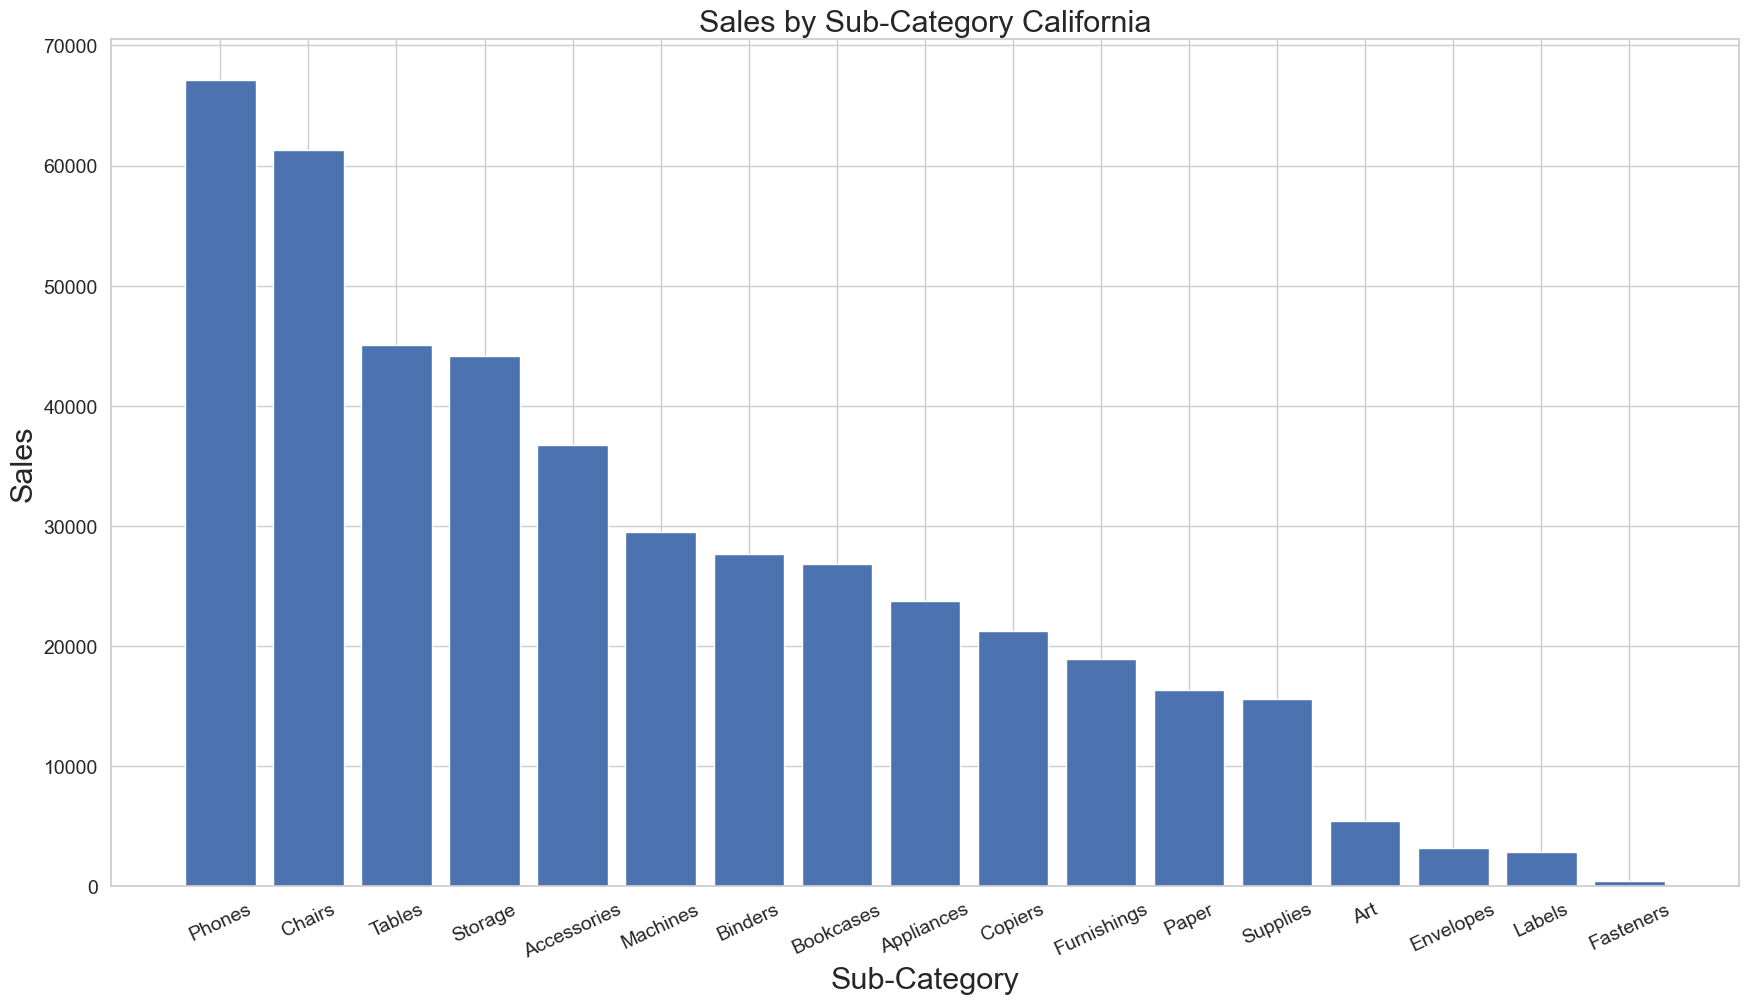

In [291]:
# Visualizing sales distribution of sub category items in California State

cat_cal = sales_by_scat_cal.sort_values(by='Sales',ascending=False).head(10)
plt.figure(figsize=(21,11))
plt.bar(sales_by_scat_cal['Sub_Category'],sales_by_scat_cal['Sales'])

plt.title('Sales by Sub-Category California', fontsize= 22)
plt.xlabel('Sub-Category', fontsize=22)
plt.ylabel('Sales', fontsize=22)
plt.xticks(fontsize=14, rotation = 25)
plt.yticks(fontsize=14)
plt.show()

In [336]:
# Sub category sales for California, New York, Texas  - highest revenue states

scat = df.groupby(['Sub_Category','State'])

top_sorted_state = scat['Sales'].sum()
top_sorted_state = top_sorted_state.sort_values(ascending = False)
sales_by_scat = pd.DataFrame({'Sub_Category': top_sorted_state.index.get_level_values('Sub_Category'),
                              'State': top_sorted_state.index.get_level_values('State'),
                              'Sales':top_sorted_state.values})

sales_by_scat_cal = sales_by_scat[sales_by_scat['State'] == 'California']
sales_by_scat_ny = sales_by_scat[sales_by_scat['State'] == 'New York']
sales_by_scat_tx = sales_by_scat[sales_by_scat['State'] == 'Texas']

sales_by_cal_ny_tx = pd.concat([sales_by_scat_cal,sales_by_scat_ny,sales_by_scat_tx])




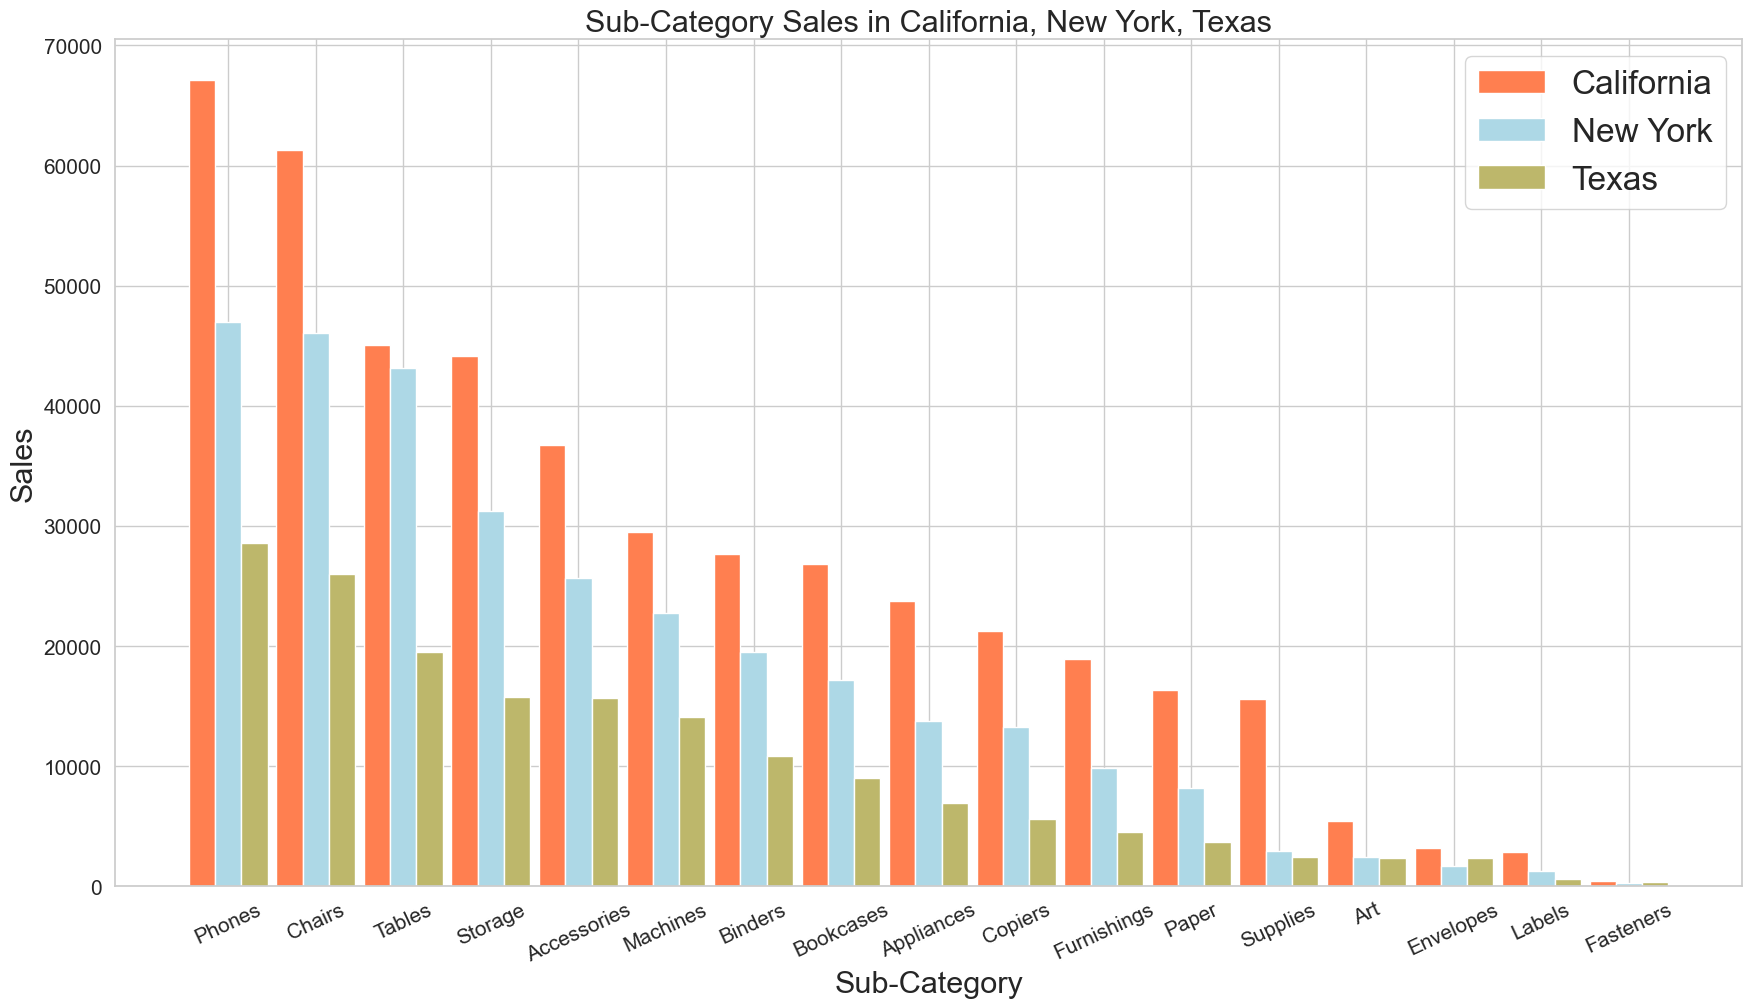

In [315]:
# Visualizing Sub-Category Sales in California, New York and Texas

cal_data = sales_by_scat[sales_by_scat['State'] == 'California']
ny_data = sales_by_scat[sales_by_scat['State'] == 'New York']
tx_data = sales_by_scat[sales_by_scat['State'] == 'Texas']

barWidth = 0.3

calpos=np.arange(len(cal_data))
newpos=[x + barWidth for x in calpos]
texpos=[x + barWidth for x in newpos]

plt.figure(figsize=(21,11))

plt.bar(calpos,cal_data['Sales'],width=barWidth, label = 'California', color = 'coral')
plt.bar(newpos,ny_data['Sales'], width=barWidth, label = 'New York', color = 'lightblue')
plt.bar(texpos,tx_data['Sales'], width=barWidth, label = 'Texas', color = 'darkkhaki')

plt.xticks(newpos, cal_data['Sub_Category'], fontsize=15, rotation=25)

plt.title('Sub-Category Sales in California, New York, Texas', fontsize= 22)
plt.xlabel('Sub-Category', fontsize=22)
plt.ylabel('Sales', fontsize=22)
plt.xticks(fontsize=15, rotation = 25)
plt.yticks(fontsize=15)
plt.legend(fontsize = 24)
plt.show()



In [388]:
# Sub category sales for North Dakota, West Virginia, Maine   - lowest revenue states

scat2 = df.groupby(['Sub_Category','State'])

top_sorted_state2 = scat2['Sales'].sum()
top_sorted_state2 = top_sorted_state2.sort_values(ascending = False)
sales_by_scat2 = pd.DataFrame({'Sub_Category': top_sorted_state2.index.get_level_values('Sub_Category'),
                              'State': top_sorted_state2.index.get_level_values('State'),
                              'Sales':top_sorted_state2.values})

sales_by_scat_nd = sales_by_scat2[sales_by_scat2['State'] == 'North Dakota']
sales_by_scat_w = sales_by_scat2[sales_by_scat2['State'] == 'West Virginia']
sales_by_scat_m = sales_by_scat2[sales_by_scat2['State'] == 'Maine']

sales_by_nd_w_tx = pd.concat([sales_by_scat2_nd,sales_by_scat2_w,sales_by_scat2_m])

sales_by_nd_w_tx


,Sub_Category,State,Sales
372,Storage,North Dakota,704.760
518,Art,North Dakota,181.840
620,Binders,North Dakota,25.900
646,Fasteners,North Dakota,7.410
377,Tables,West Virginia,673.344
428,Paper,West Virginia,447.840
561,Binders,West Virginia,88.640
433,Phones,Maine,437.850
467,Accessories,Maine,323.400
489,Paper,Maine,259.740


In [526]:
# Top product sales by state

product = df.groupby(['Product_Name', 'State'])['Sales'].sum().reset_index()
top_prod_sales = product.sort_values(by = 'Sales', ascending=False)
top_prod_sales.head(15)


,Product_Name,State,Sales
1897,Cisco TelePresence System EX90 Videoconferenci...,Florida,22638.480
1732,Canon imageCLASS 2200 Advanced Copier,Indiana,17499.950
1735,Canon imageCLASS 2200 Advanced Copier,Washington,13999.960
3585,High Speed Automatic Electric Letter Opener,California,13100.240
4350,Lexmark MX611dhe Monochrome Laser Printer,Texas,11219.934
1733,Canon imageCLASS 2200 Advanced Copier,New York,11199.968
1731,Canon imageCLASS 2200 Advanced Copier,Delaware,10499.970
2970,GBC Ibimaster 500 Manual ProClick Binding System,Michigan,9892.740
3959,Ibico EPK-21 Electric Binding System,Minnesota,9449.950
78,"3D Systems Cube Printer, 2nd Generation, Magenta",New Jersey,9099.930


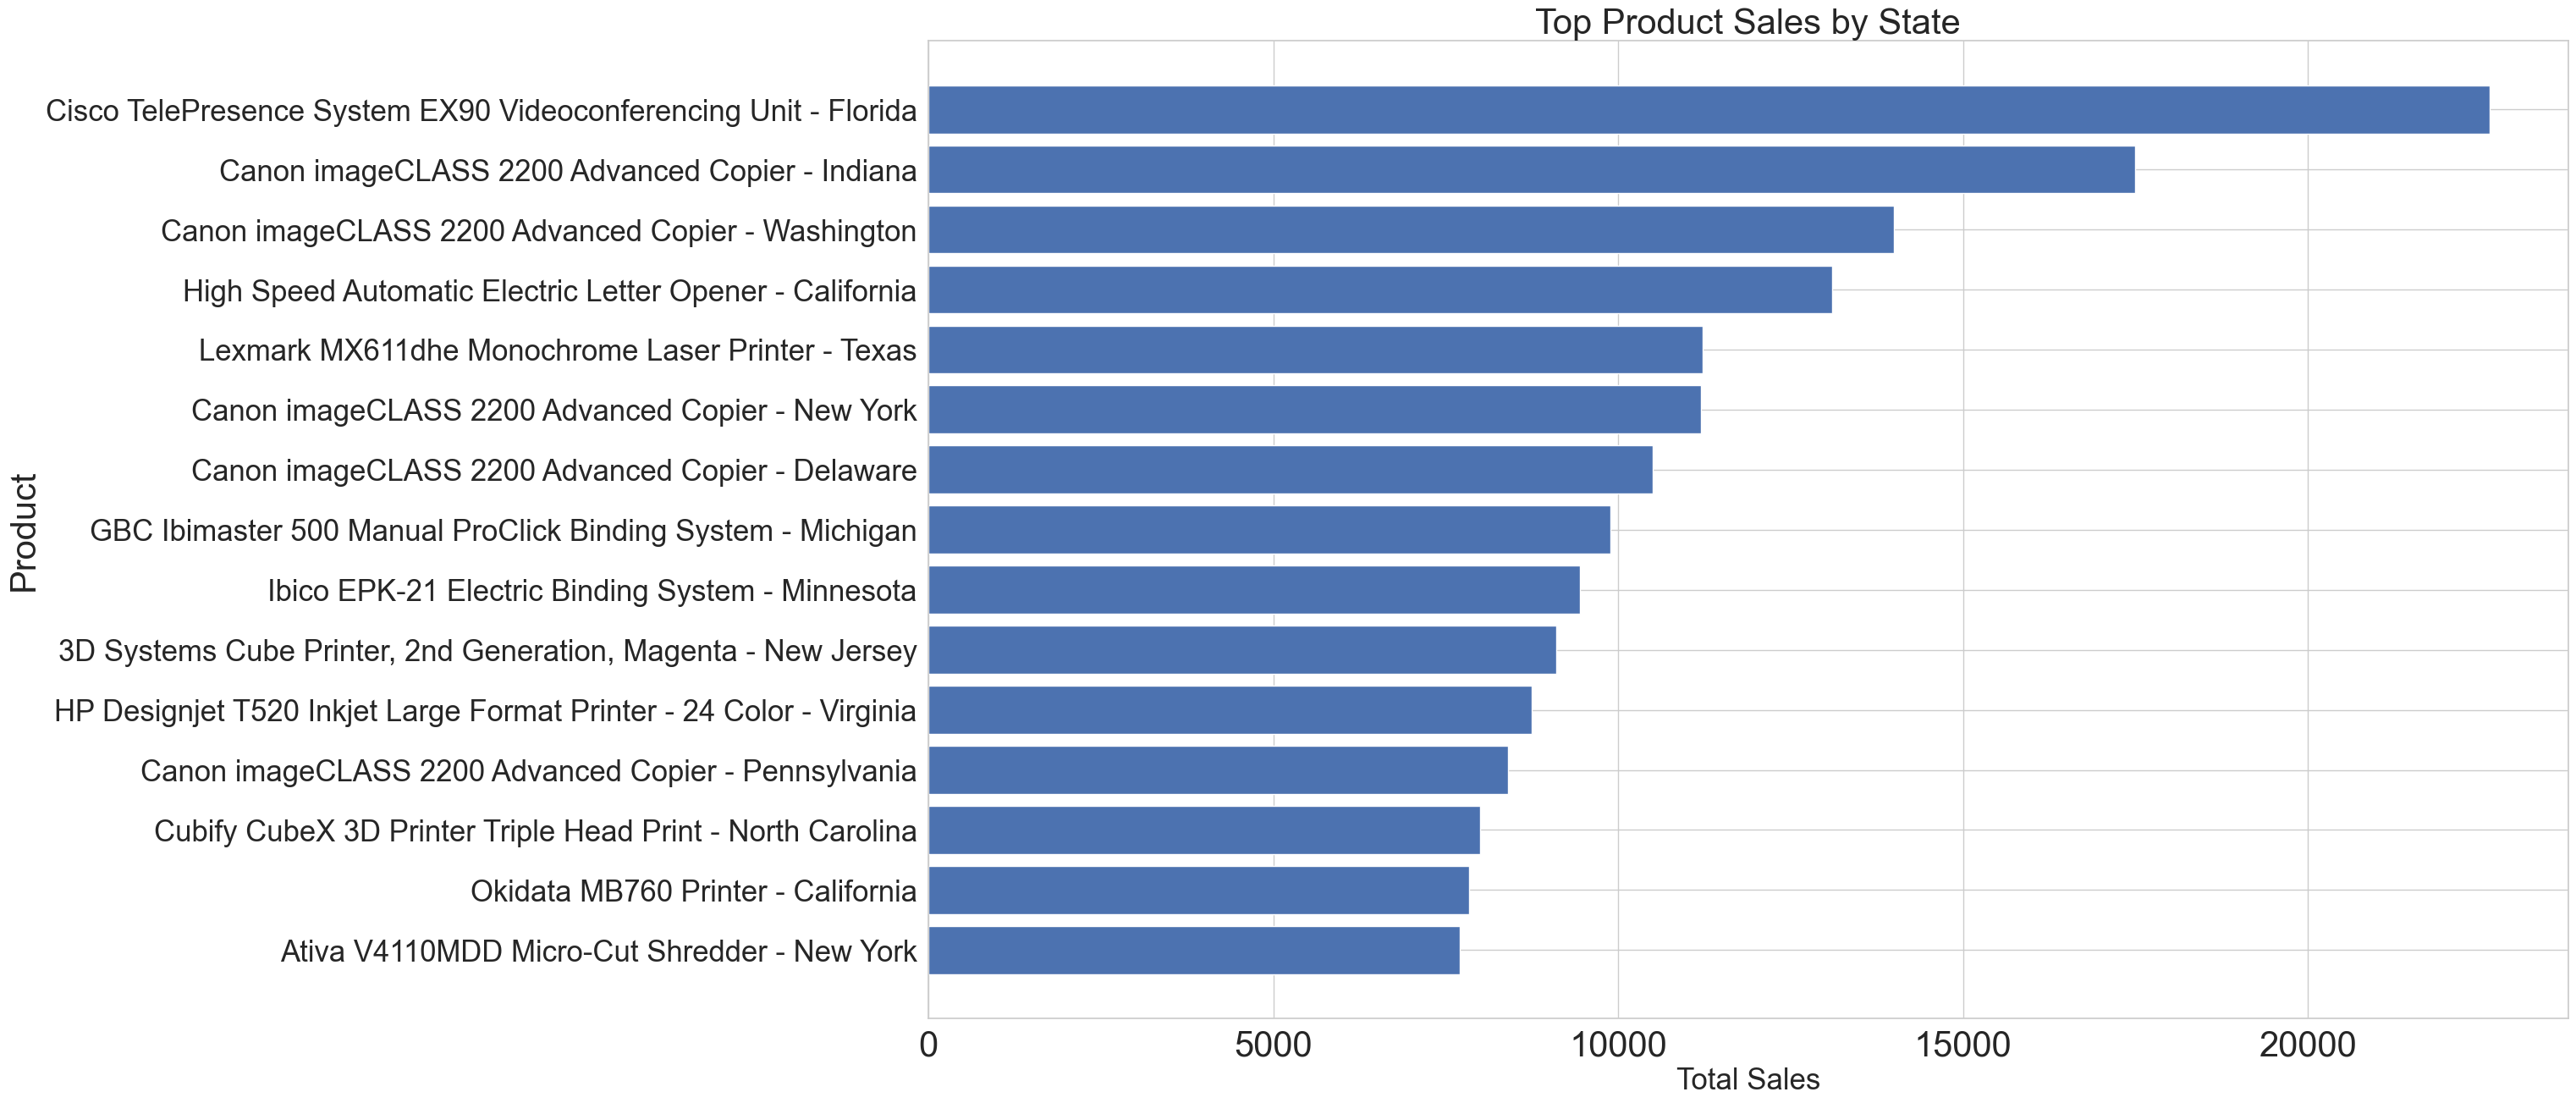

In [642]:
# visualizing top product sales by state


top_15_products = top_prod_sales.head(15)
plt.figure(figsize= (25,15))
plt.barh(top_15_products['Product_Name'] + ' - ' +  top_15_products['State'], top_15_products['Sales'])
plt.xlabel('Total Sales', fontsize = 25)
plt.ylabel('Product', fontsize = 30)
plt.title('Top Product Sales by State', fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 25)

plt.gca().invert_yaxis()
plt.show()

In [519]:
# lowest product sales by state

product = df.groupby(['Product_Name', 'State'])['Sales'].sum().reset_index()
top_prod_sales = product.sort_values(by = 'Sales',ascending=False)
top_prod_sales.tail(15)

,Product_Name,State,Sales
4107,Insertable Tab Indexes For Data Binders,Texas,1.272
2332,Economy Binders,Texas,1.248
8043,Zipper Ring Binder Pockets,Texas,1.248
5191,"OIC Binder Clips, Mini, 1/4 Capacity, Black",New York,1.240
6962,Universal Recycled Hanging Pressboard Report B...,Texas,1.234
1172,Avery Reinforcements for Hole-Punch Pages,Pennsylvania,1.188
1169,Avery Reinforcements for Hole-Punch Pages,Colorado,1.188
1006,Avery Binder Labels,Florida,1.167
7146,Wilson Jones Easy Flow II Sheet Lifters,Oregon,1.080
7147,Wilson Jones Easy Flow II Sheet Lifters,Texas,1.080


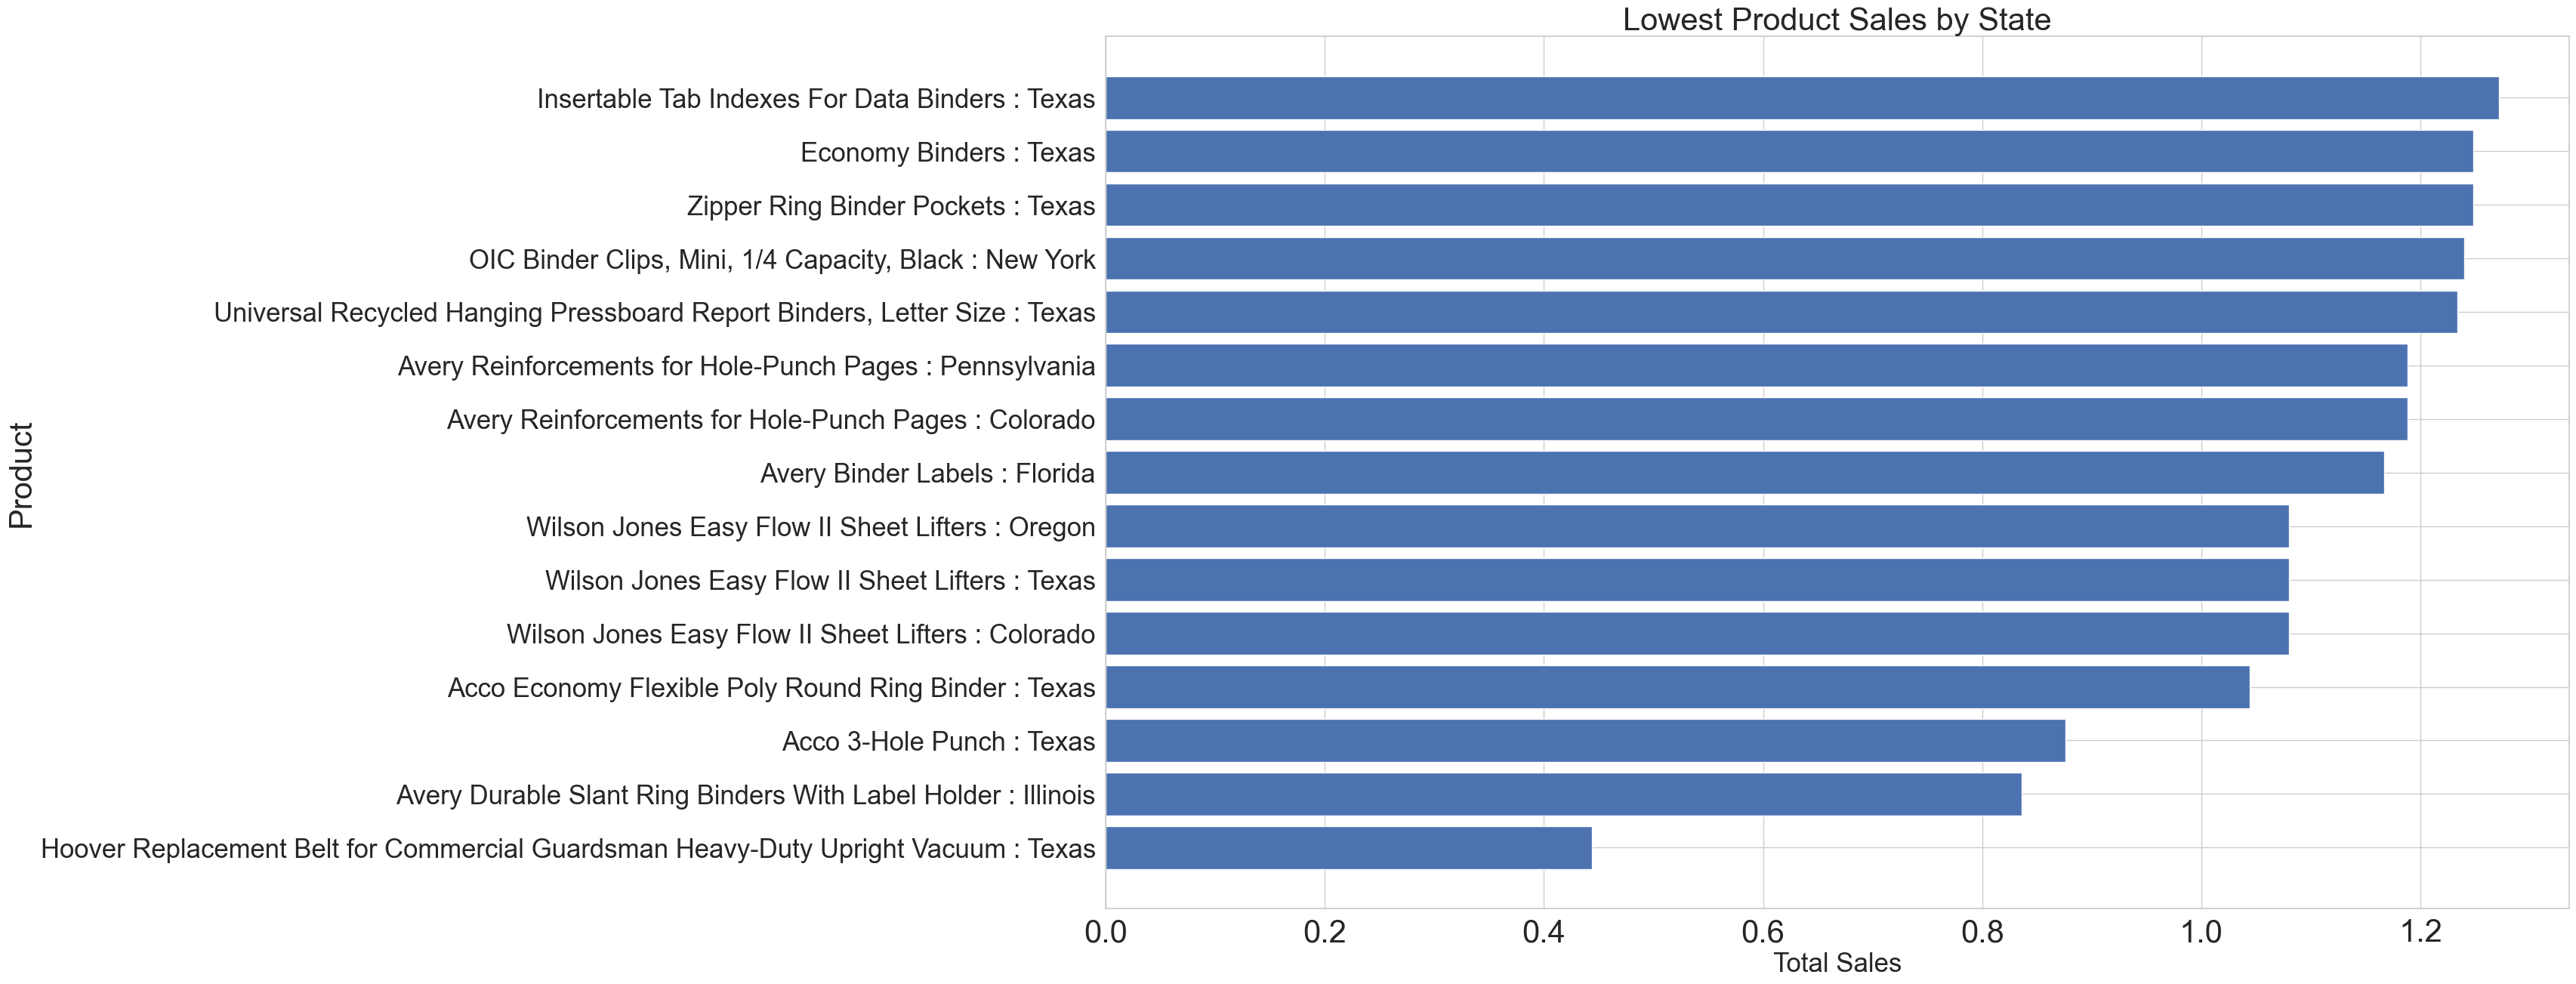

In [640]:
# visualizing lowest product sales by state

lowest_15_products = top_prod_sales.tail(15)
plt.figure(figsize= (25,15))
plt.barh(lowest_15_products['Product_Name'] + ' : ' +  lowest_15_products['State'], lowest_15_products['Sales'])
plt.xlabel('Total Sales', fontsize = 25)
plt.ylabel('Product', fontsize = 30)
plt.title('Lowest Product Sales by State', fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 25)

plt.gca().invert_yaxis()
plt.show()

In [527]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [587]:
# extracting month from Order_date column

monthly_sales = df.resample('M', on='Order_Date')['Sales'].sum().reset_index()


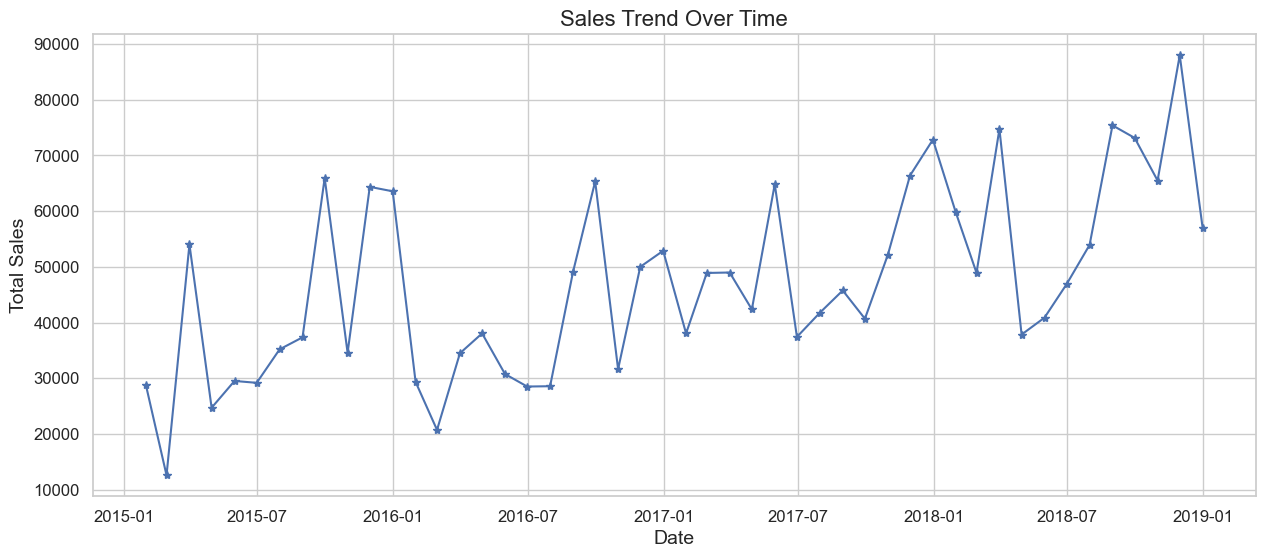

In [637]:
# visualizing sales over time

plt.figure(figsize= (15,6))
plt.plot(monthly_sales['Order_Date'], monthly_sales['Sales'],marker='*', linestyle='-')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Total Sales', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Sales Trend Over Time', fontsize = 16)
plt.show()

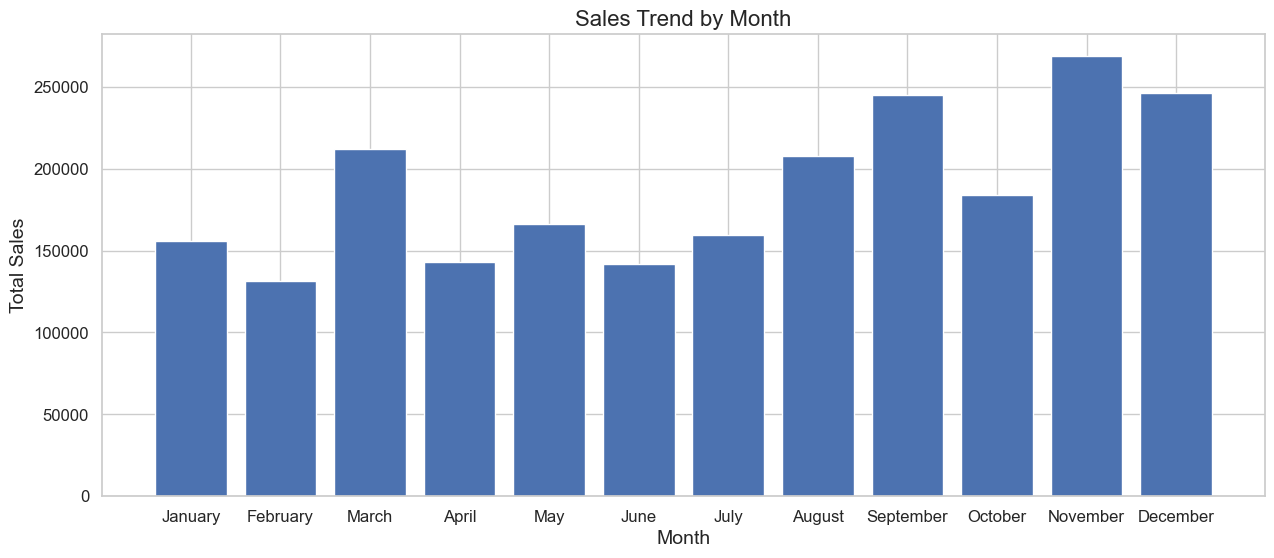

In [643]:
import calendar
#creating new month column and visualizing overall sales per month

df['month'] = df['Order_Date'].dt.month
m_sales = df.groupby('month')['Sales'].sum().reset_index()
m_sales['month_name'] = m_sales['month'].apply(lambda x: calendar.month_name[x])

plt.figure(figsize = (15, 6))
plt.bar(m_sales['month'], m_sales['Sales'])
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Total Sales', fontsize = 14)
plt.title('Sales Trend by Month', fontsize = 16)
plt.xticks(m_sales['month'],m_sales['month_name'], fontsize = 12)  
plt.yticks(fontsize = 12)
plt.show()

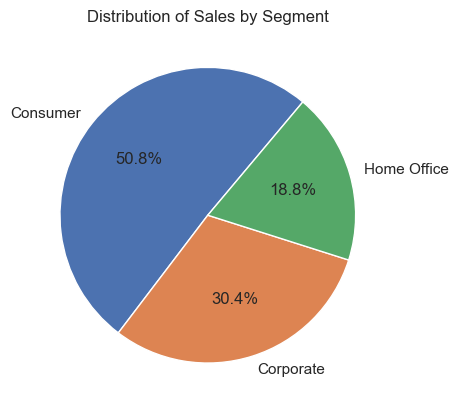

In [667]:
# distribution of sales by segment

sales_by_segment = df.groupby(['Segment'])['Sales'].sum().reset_index()
plt.pie(sales_by_segment['Sales'], labels=sales_by_segment['Segment'],autopct='%1.1f%%',startangle = 50)
plt.title('Distribution of Sales by Segment')
plt.show()


In [668]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,month
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,8
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,8
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,12
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,11
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,11


In [682]:
# top sales by city
city = df.groupby(['City'])['Sales'].sum().reset_index()
top_city = city.sort_values(by = 'Sales',ascending=False)
top_city.head(15)
low_city=top_city[-15:]

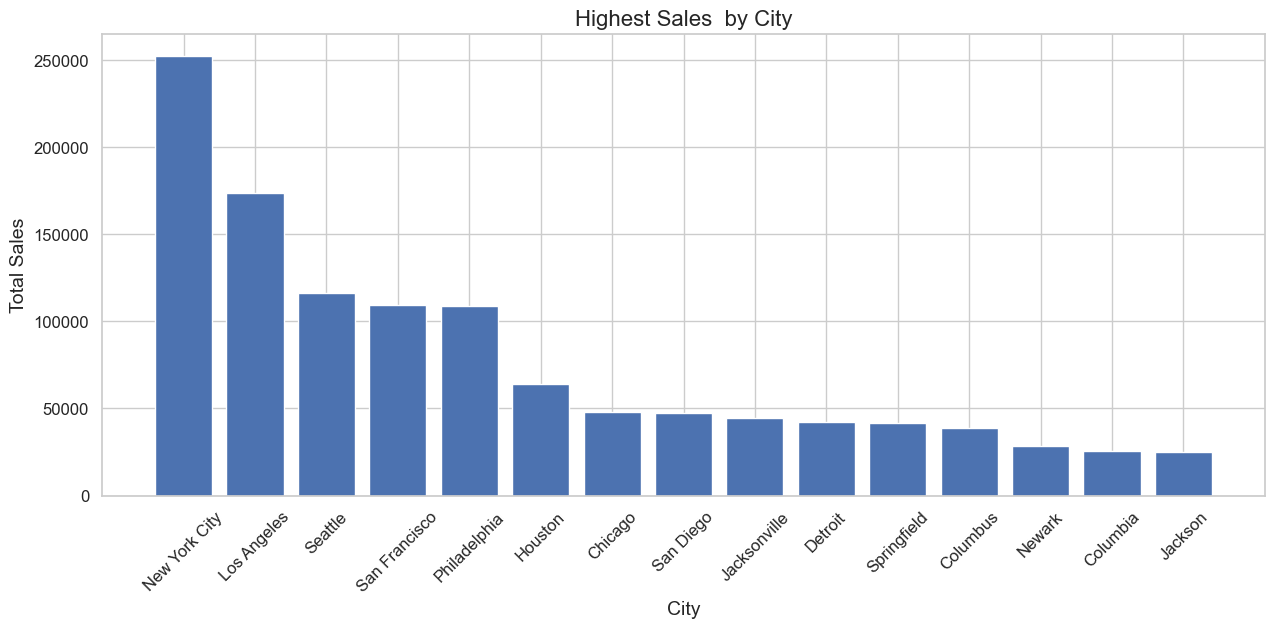

In [690]:
# visualizing highest sales by city
city_sales = top_city.head(15)
plt.figure(figsize = (15, 6))
plt.bar(city_sales['City'], city_sales['Sales'])
plt.xlabel('City', fontsize = 14)
plt.ylabel('Total Sales', fontsize = 14)
plt.title('Highest Sales  by City', fontsize = 16)
plt.xticks( rotation = 45, fontsize = 12)  
plt.yticks(fontsize = 12)

plt.show()

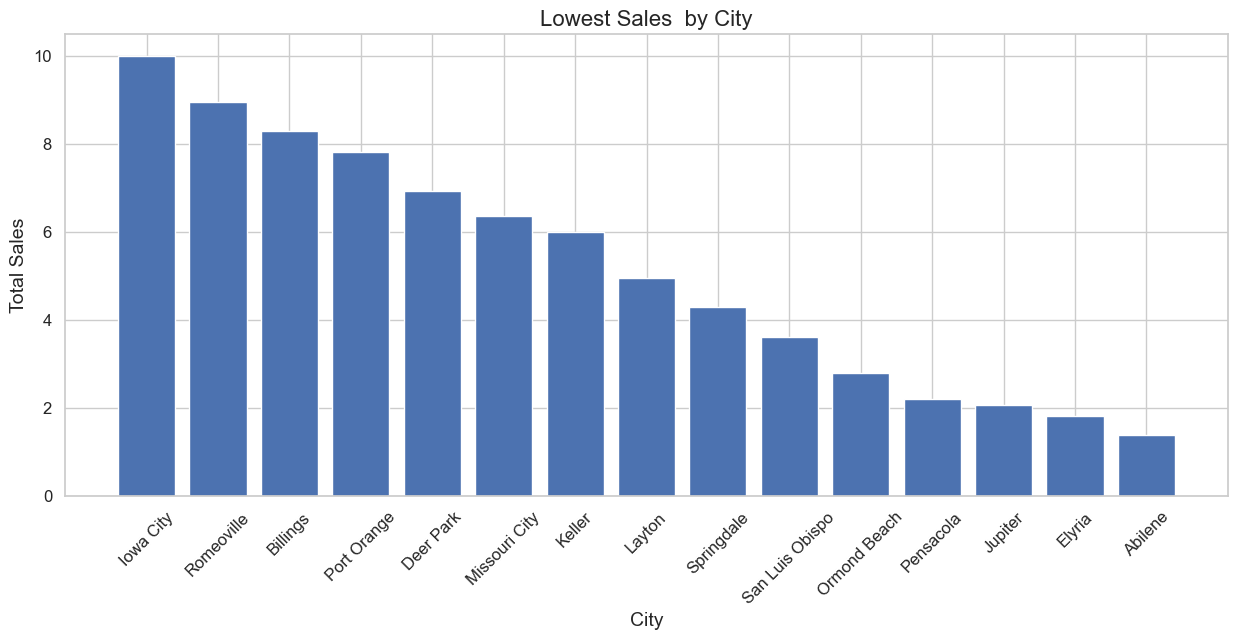

In [693]:
#visualizing lowest sales by city
low_city
plt.figure(figsize = (15, 6))
plt.bar(low_city['City'], low_city['Sales'])
plt.xlabel('City', fontsize = 14)
plt.ylabel('Total Sales', fontsize = 14)
plt.title('Lowest Sales  by City', fontsize = 16)
plt.xticks( rotation = 45, fontsize = 12)  
plt.yticks(fontsize = 12)

plt.show()